In [1]:
# Load necessary libraries
library(readr)
library(tibble)
library(dplyr)


Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Load the data using readr
covid_data <- read_csv("/COVID-19-Data-Analysis-Report-with-R/tested_worldwide.csv")

# Convert to a tibble for easier exploration
covid_data <- as_tibble(covid_data)

Rows: 27641 Columns: 12


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country_Region, Province_State
dbl  (9): positive, active, hospitalized, hospitalizedCurr, recovered, death...
date (1): Date



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 27,641 × 12
   Date       Country_Region Province_State positive active hospitalized
   <date>     <chr>          <chr>             <dbl>  <dbl>        <dbl>
 1 2020-01-16 Iceland        All States            3     NA           NA
 2 2020-01-17 Iceland        All States            4     NA           NA
 3 2020-01-18 Iceland        All States            7     NA           NA
 4 2020-01-20 South Korea    All States            1     NA           NA
 5 2020-01-22 United States  All States            0     NA           NA
 6 2020-01-22 United States  Massachusetts         0     NA           NA
 7 2020-01-22 United States  Washington            0     NA           NA
 8 2020-01-23 United States  All States            0     NA           NA
 9 2020-01-23 United States  Massachusetts         0     NA           NA
10 2020-01-23 United States  Washington            0     NA           NA
# ℹ 27,631 more rows
# ℹ 6 more variables: hospitalizedCurr <dbl>, recovered <dbl>, death <dbl>,
#  

$summary_statistics
# A tibble: 108 × 4
   Country_Region               total_tests total_positive_cases positivity_rate
   <chr>                              <dbl>                <dbl>           <dbl>
 1 Ecuador                           278341                 5289           1.90 
 2 Mexico                            392396                 5528           1.41 
 3 Scotland                          296097                 3491           1.18 
 4 Piedmont                          490999                 5073           1.03 
 5 France                           1976091                20112           1.02 
 6 Panama                             64634                  605           0.936
 7 Bolivia                            17082                  148           0.866
 8 Liguria                           127240                 1048           0.824
 9 Nigeria                           104746                  851           0.812
10 Democratic Republic of the …        1733                   14     

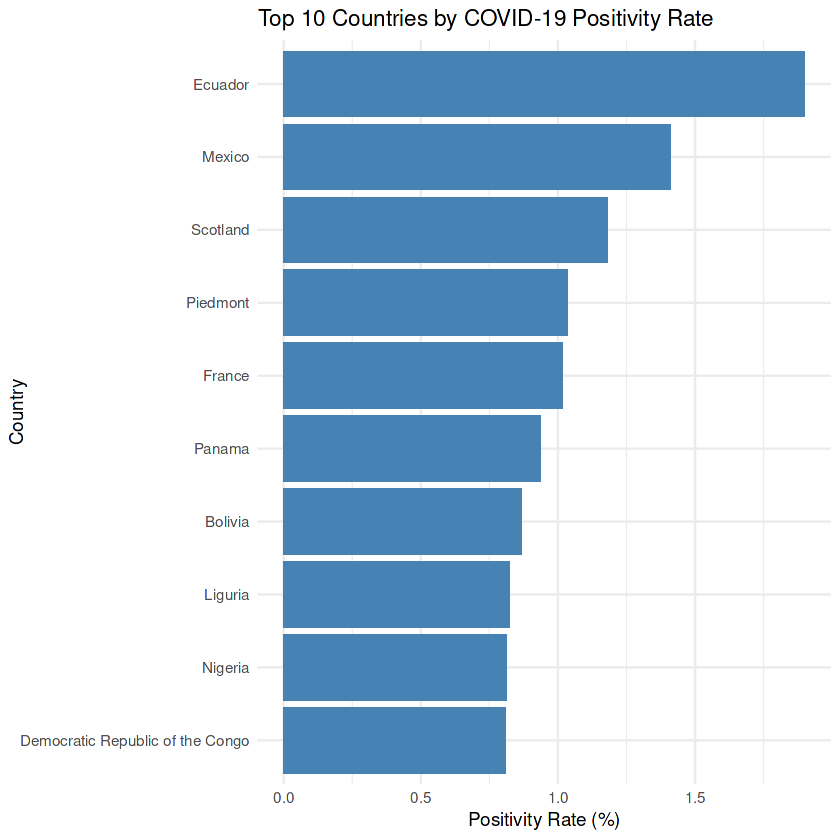

In [ ]:
# View the first few rows and structure of the dataset
print(covid_data)

# Filter and select the interested columns
# is.na means is not available
covid_filtered <- covid_data %>%
  filter(!is.na(total_tested), !is.na(daily_positive)) %>%
  select(Country_Region, total_tested, daily_positive)

# Aggregate and calculate summary statistics
summary_stats <- covid_filtered %>%
  group_by(Country_Region) %>%
  summarize(
    total_tests = sum(total_tested),
    total_positive_cases = sum(daily_positive),
    positivity_rate = (total_positive_cases / total_tests) * 100
  ) %>%
  arrange(desc(positivity_rate))

# Top 10 countries by total tests
top_test_countries <- summary_stats %>%
  arrange(desc(total_tests)) %>%
  slice_head(n = 10)

# Top 10 countries by positivity rate
top_positive_countries <- summary_stats %>%
  arrange(desc(positivity_rate)) %>%
  slice_head(n = 10)

# Create vectors for country names and positivity rates
top_countries <- top_positive_countries$Country_Region
positivity_rates <- top_positive_countries$positivity_rate

# Create a matrix with country names and positivity rates
results_matrix <- cbind(top_countries, positivity_rates)

# Compile results into a list
results_list <- list(
  summary_statistics = summary_stats,
  top_test_countries = top_test_countries,
  top_positive_countries = top_positive_countries,
  findings_matrix = results_matrix
)

# Print the list
print(results_list)

# Load ggplot2
library(ggplot2)

# Plot the top 10 countries by positivity rate
#labs means labels; theme_minimal means minimize the annotations in the background 
ggplot(summary_stats %>% slice_max(positivity_rate, n = 10), aes(x = reorder(Country_Region, positivity_rate), y = positivity_rate)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 10 Countries by COVID-19 Positivity Rate",
    x = "Country",
    y = "Positivity Rate (%)"
  ) +
  theme_minimal()